**Sentiment** **analysis** **using** **binary** **classification**

Sentiment analysis using binary classification

One of the common uses for binary classification in machine learning is analyzing text for sentiment — specifically, assigning a text string a score from 0 to 1, where 0 represents negative sentiment and 1 represents positive sentiment. A restaurant review such as "Best meal I've ever had and awesome service, too!" might score 0.9 or higher, while a statement such as "Long lines and poor customer service" would score closer to 0. Marketing departments sometimes use sentiment-anlysis models to monitor social-media services for feedback so they can respond quickly if, for example, comments regarding their company suddenly turn negative.

To train a sentiment-analysis model, you need a dataset containing text strings labeled with 0s (for negative sentiment) and 1s (for positive sentiment). Several such datasets are available in the public domain. We will use one containing 50,000 movie reviews, each labeled with a 0 or 1. Once the model is trained, scoring a text string for sentiment is a simple matter of passing it to the model and asking for the probability that the predicted label is 1. A probability of 80% means the sentiment score is 0.8 and that the text is very positive.

**Load** **and** **prepare** **the** **data**

The first step is to load the dataset and prepare it for use in machine learning. Because machine-learning models can't deal with text, we'll use scikit-learn's CountVectorizer class to vectorize the training text. Then we'll split the data for training and testing.

In [1]:
!git clone https://github.com/Nashra-Tazmeen/sentimental_classification.git

Cloning into 'sentimental_classification'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 24.11 MiB | 16.99 MiB/s, done.


In [3]:
import pandas as pd
df=pd.read_csv("/content/sentimental_classification/sentimental_classifier_ml/reviews.csv",encoding="ISO-8859-1")


In [5]:
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


Check for duplicate rows in the dataset.

In [10]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

from above Data set seems balanced but lets see the distribution of data after removing  duplicates  

In [13]:
df=df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

Use CountVectorizer to vectorize the text in the DataFrame's "Text" column using a built-in dictionary of stop words. Set min_df to 20 to ignore words that appear less than 20 times in the corpus of training text. This will reduce the likelihood of out-of-memory errors and will probably make the model more accurate as well.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=20)
x=vectorizer.fit_transform(df['Text'])
y=df['Sentiment']

In addition to creating sparse matrices of vectorized text, Countvectorizer converts text to lowercase, removes stop words and punctuation characters, and more. Let's see how it cleans text before vectorizing it by transforming a string, and then reversing the transform.

In [15]:
text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['customer', 'long', 'poor', 'really', 'service', 'turned'],
      dtype='<U25')]


Split the dataset for training and testing. We'll do a 50/50 split since the dataset contains nearly 50,000 samples.

In [16]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

**Train** a **logistic**-**regression** **model**

The next step is to train a classifier. We'll use scikit-learn's LogisticRegression classifier, which uses logistic regression to fit a model to the data.

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Validate the trained model with the 50% of the dataset aside for testing and show a confusion matrix

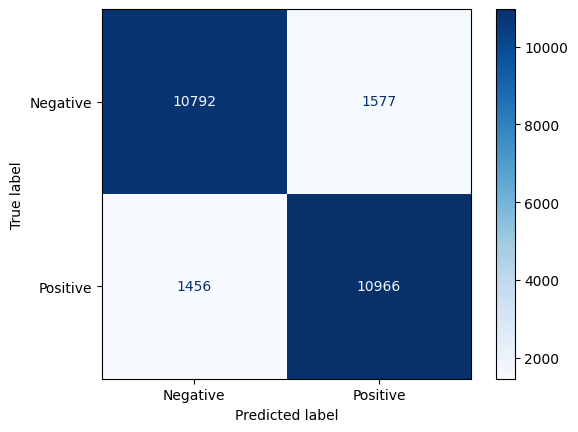

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix display
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues')



The model correctly identified 10,795 negative reviews while misclassifying 1,574 of them. It correctly identified 10,966 positive reviews and got it wrong 1,456 times. Use the score method to get a rough measure of the model's accuracy.

In [21]:

model.score(x_test, y_test)

0.8776572143116453

Now retrieve the Receiver Operating Characteristic (ROC) metric for a better measure of accuracy.

In [22]:
from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])


0.9451676594376754

**Use** t**h**e **model** **to** **analyze** **text**

Let's score a review by vectorizing the text of that review and passing it to the model's predict_proba method. Are the results consistent with what you would expect?

In [23]:
review = 'The long lines and poor customer service really turned me off.'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.09147293269678763


Now score a more positive review and see if the model agrees that the sentiment is positive.

In [24]:
review = 'One of the more delightful experiences I have had!'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.7024750049159794